In [1]:
# Connecting to google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
## Mounting the Drive

import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS254-Project/' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['data', 'img', 'Alireza_Fath_Project_1.ipynb', 'MLProjectcsvout1.csv', 'MLProjectcsvout2.csv', 'Mehrdad_Mohammad_Alireza.ipynb', 'Copy of Mehrdad_Mohammad_Alireza.ipynb', 'Copy of Copy of Copy of Mehrdad_Mohammad_Alireza.ipynb', 'Copy of Copy of Mehrdad_Mohammad_Alireza.ipynb', 'Mehrdad_Mohammad_AlirezaV2.ipynb', '4.23.2023.Copy of Mehrdad_Mohammad_Alireza.ipynb', 'Copy of 4.23.2023.Copy of Mehrdad_Mohammad_Alireza.ipynb', 'MLDataTOut.gsheet', 'MLDataTCell.csv', 'MLDataThermal.csv', 'MLDataTOut.csv', 'MLDataElectrical.csv']


In [3]:
# importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
# Load the data and store it in a pandas dataframe


path = GOOGLE_DRIVE_PATH + '/MLDataThermal.csv'
data = pd.read_csv(path, header=None, names=['FlowRate', 'VolumeFraction', 'SolarRadiation', 'ThermalEfficiency'])
data.head(n=8)

,FlowRate,VolumeFraction,SolarRadiation,ThermalEfficiency
0,40.000000,2.000000,1000,76.866311
1,16.666667,0.666667,800,73.238863
2,22.500000,2.000000,700,71.060563
3,28.333333,2.000000,1200,78.542307
4,28.333333,2.000000,1000,76.511377
5,34.166667,2.000000,700,71.421367
6,16.666667,1.000000,800,73.235971
7,40.000000,0.666667,800,73.916461


In [5]:
# Evaluate the Data
data.describe()

,FlowRate,VolumeFraction,SolarRadiation,ThermalEfficiency
count,50.000000,50.000000,50.000000,50.000000
mean,26.000000,1.273333,920.000000,74.969400
std,11.242281,0.484171,167.819145,2.496249
min,10.833333,0.333333,700.000000,70.646275
25%,16.666667,1.000000,800.000000,73.236694
50%,28.333333,1.333333,900.000000,75.381294
75%,38.541667,1.666667,1075.000000,76.966030
max,40.000000,2.000000,1200.000000,78.916624


In [6]:
# set X (training data) and y (target variable)

cols = data.shape[1]
X = data.iloc[:,0:cols-1] # iloc slicing function 
y = data.iloc[:,cols-1:cols]
y=y.values.ravel()

In [7]:
X.shape, y.shape

((50, 3), (50,))

In [8]:
from sklearn.preprocessing import StandardScaler
#Center to the mean and component wise scale to unit variance.
print(X.head(n=1))
standardized_X = preprocessing.scale(X)
# print(standardized_X)

print(standardized_X[0:8])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print(X_scaled)
X_unscaled = scaler.inverse_transform(X_scaled)
print(X_unscaled[0:8])


   FlowRate  VolumeFraction  SolarRadiation
0      40.0             2.0            1000
[[ 1.2579418   1.51608389  0.48154341]
 [-0.83862787 -1.26572141 -0.72231512]
 [-0.31448545  1.51608389 -1.32424438]
 [ 0.20965697  1.51608389  1.68540194]
 [ 0.20965697  1.51608389  0.48154341]
 [ 0.73379939  1.51608389 -1.32424438]
 [-0.83862787 -0.57027009 -0.72231512]
 [ 1.2579418  -1.26572141 -0.72231512]]
[[4.00000000e+01 2.00000000e+00 1.00000000e+03]
 [1.66666667e+01 6.66666667e-01 8.00000000e+02]
 [2.25000000e+01 2.00000000e+00 7.00000000e+02]
 [2.83333333e+01 2.00000000e+00 1.20000000e+03]
 [2.83333333e+01 2.00000000e+00 1.00000000e+03]
 [3.41666667e+01 2.00000000e+00 7.00000000e+02]
 [1.66666667e+01 1.00000000e+00 8.00000000e+02]
 [4.00000000e+01 6.66666667e-01 8.00000000e+02]]


In [9]:
# Split the data into training and testing, 80% for training and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.20, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 3), (10, 3), (40,), (10,))

In [11]:
# Using cross-validation to randomly find the best Hyperparameters

model=SVR(kernel="rbf", gamma="auto").fit(X_train, y_train)
y_pred_before=model.predict(X_test)

# Range of the Hyperparameters

C_range = np.logspace(0, 4, 20000)
epsilon_range = np.logspace(-8, 3, 20000)


# specify parameters and distributions to sample from
param_dist = {"epsilon": epsilon_range,
              "C": C_range}

# run randomized search
n_iter_search = 5000
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=10)

random_search.fit(X_train, y_train)

# summarize the results of the random search
print(random_search.best_score_)
print(random_search.best_estimator_.epsilon)
print(random_search.best_estimator_.C)
y_pred_after=SVR(kernel="rbf", C=random_search.best_estimator_.C, gamma="auto", epsilon=random_search.best_estimator_.epsilon).fit(X_train, y_train).predict(X_test)

# comparing the model before and after finding the best hyperparameters

score_before=r2_score(y_test, y_pred_before)
score_after=r2_score(y_test, y_pred_after)

print(score_before)
print(score_after)

0.9744534349807852
0.060205890161762816
739.8496235637357
0.87863186804952
0.9609953954288228


In [12]:
# Comparing the predicted output versus the test output

# Mean_Value
mean_value=np.mean(y_train)
mean_array=np.ones(10)*mean_value
mean_score=r2_score(y_test, mean_array)

d = {'Predicted Output': y_pred_after, 'Mean Output': mean_value, 'Test Output': y_test }
df = pd.DataFrame(data=d)
df.loc[len(df.index)] = [score_after, mean_score, 'R2 Score']
df.head(11)


,Predicted Output,Mean Output,Test Output
0,73.642954,74.857268,73.908532
1,76.715212,74.857268,77.389811
2,77.912258,74.857268,78.916624
3,77.364308,74.857268,77.377891
4,75.117877,74.857268,75.173431
5,77.511876,74.857268,77.832587
6,71.125167,74.857268,71.300482
7,75.224020,74.857268,75.589158
8,72.768666,74.857268,72.800843
9,73.330799,74.857268,73.889899


In [13]:
from google.colab import files

df.to_csv('thermaltable.csv', index=False)
files.download('thermaltable.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
minx0=min(standardized_X[:,0])
maxx0=max(standardized_X[:,0])
minx1=min(standardized_X[:,1])
maxx1=max(standardized_X[:,1])
minx2=min(standardized_X[:,2])
maxx2=max(standardized_X[:,2])

minx0_unscaled=min(X_unscaled[:,0])
maxx0_unscaled=max(X_unscaled[:,0])
minx1_unscaled=min(X_unscaled[:,1])
maxx1_unscaled=max(X_unscaled[:,1])
minx2_unscaled=min(X_unscaled[:,2])
maxx2_unscaled=max(X_unscaled[:,2])

In [15]:
meanx2=np.mean(standardized_X[:,2], axis=0)
meanx2array=np.ones(100)*meanx2
print(standardized_X.shape)
print(standardized_X[:,2])

x0_n= 1.2579418  # Flow Rate 40
x1_n= -0.57027009 # Volume Fraction 1
x2_n= 0.48154341 # Radiation 1000

(50, 3)
[ 0.48154341 -0.72231512 -1.32424438  1.68540194  0.48154341 -1.32424438
 -0.72231512 -0.72231512 -1.32424438  0.48154341 -0.72231512 -1.32424438
 -1.32424438 -0.72231512  1.08347268  1.08347268 -1.32424438 -0.12038585
 -0.12038585 -0.72231512 -1.32424438  0.48154341  0.48154341 -1.32424438
  1.08347268 -0.12038585 -1.32424438 -1.32424438 -0.72231512  0.48154341
  1.68540194  1.08347268 -0.72231512  0.48154341 -0.12038585  0.48154341
 -0.12038585  1.68540194  0.48154341  1.08347268 -0.72231512  0.48154341
 -0.12038585 -1.32424438  1.08347268  1.08347268 -0.12038585  1.68540194
  1.68540194  1.08347268]


In [16]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data

x0 = np.linspace(minx0, maxx0, 100)
x1 = np.linspace(minx1, maxx1, 100)
x2 = np.linspace(minx2, maxx2, 100)
pred=1.5
x0p = np.linspace(minx0, pred*maxx0, int(pred*100))
x1p = np.linspace(minx1, pred*maxx1, int(pred*100))
x2p = np.linspace(minx2,pred*maxx2, int(pred*100))


x0_unscaled = np.linspace(minx0_unscaled, maxx0_unscaled, 100)
x1_unscaled = np.linspace(minx1_unscaled, maxx1_unscaled, 100)
x2_unscaled = np.linspace(minx2_unscaled, maxx2_unscaled, 100)

x0_unscaledp = np.linspace(minx0_unscaled, pred*maxx0_unscaled, int(pred*100))
x1_unscaledp = np.linspace(minx1_unscaled, pred*maxx1_unscaled, int(pred*100))
x2_unscaledp = np.linspace(minx2_unscaled, pred*maxx2_unscaled, int(pred*100))

print(meanx2array.shape)



(100,)


In [17]:
model_best=SVR(kernel="rbf", C=random_search.best_estimator_.C, gamma="auto", epsilon=random_search.best_estimator_.epsilon).fit(X_train, y_train)
z0=np.zeros((100,100))
print(z0.shape)
for i in range(100):
 for j in range(100):
   aa=np.column_stack((x0[i],x1[j],x2_n))
   z0[i][j] = model_best.predict(aa)


x0_unscaled_m0, x1_unscaled_m0 = np.meshgrid(x0_unscaled, x1_unscaled)

(100, 100)


In [18]:
model_best=SVR(kernel="rbf", C=random_search.best_estimator_.C, gamma="auto", epsilon=random_search.best_estimator_.epsilon).fit(X_train, y_train)
z1=np.zeros((100,100))
print(z1.shape)
for i in range(100):
 for j in range(100):
   aa=np.column_stack((x0[i],x1_n,x2[j]))
   z1[i][j] = model_best.predict(aa)


x0_unscaled_m1, x2_unscaled_m1 = np.meshgrid(x0_unscaled, x2_unscaled)

(100, 100)


In [19]:
model_best=SVR(kernel="rbf", C=random_search.best_estimator_.C, gamma="auto", epsilon=random_search.best_estimator_.epsilon).fit(X_train, y_train)
z2=np.zeros((100,100))
print(z2.shape)
for i in range(100):
 for j in range(100):
   aa=np.column_stack((x0_n,x1[i],x2[j]))
   z2[i][j] = model_best.predict(aa)


x1_unscaled_m2, x2_unscaled_m2 = np.meshgrid(x1_unscaled, x2_unscaled)

(100, 100)


In [20]:
# 2D Flow
model_best=SVR(kernel="rbf", C=random_search.best_estimator_.C, gamma="auto", epsilon=random_search.best_estimator_.epsilon).fit(X_train, y_train)
z0_2D=np.zeros((100))

for i in range(100):
   aa=np.column_stack((x0[i],x1_n,x2_n))
   z0_2D[i] = model_best.predict(aa)

In [21]:
# 2D Volume
model_best=SVR(kernel="rbf", C=random_search.best_estimator_.C, gamma="auto", epsilon=random_search.best_estimator_.epsilon).fit(X_train, y_train)
z1_2D=np.zeros((100))

for i in range(100):
   aa=np.column_stack((x0_n,x1[i],x2_n))
   z1_2D[i] = model_best.predict(aa)

<ipython-input-22-26d020848750>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, orientation='vertical', shrink=0.9)


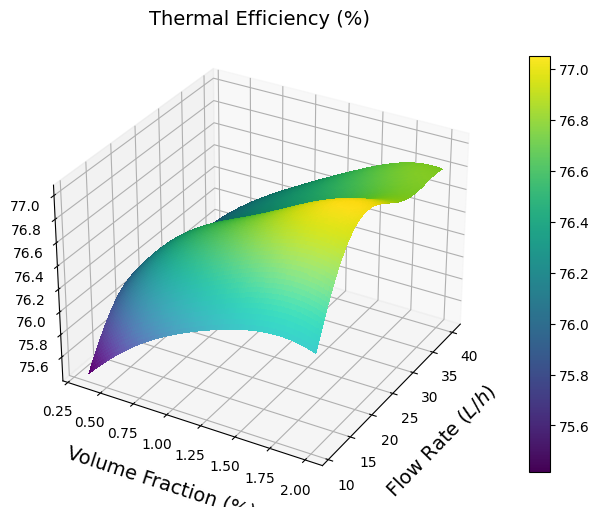

In [22]:

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)

rgb = ls.shade(z0, cmap=cm.viridis, vert_exag=0.1, blend_mode='soft')

surf = ax.plot_surface(x0_unscaled_m0, x1_unscaled_m0, z0, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

ax.set_xlabel('Flow Rate ($L/h$)', fontsize=14, labelpad=10)
ax.set_ylabel('Volume Fraction (%)', fontsize=14, labelpad=10)

ax.view_init(elev=30, azim=30)

ax.set_title('Thermal Efficiency (%)',  fontsize=14)
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(z0)
plt.colorbar(m, orientation='vertical', shrink=0.9)
ax.invert_xaxis()
ax.grid(True)
plt.savefig('Thermal_Volume_Flow.png')
plt.show()


In [23]:
from google.colab import files
files.download('Thermal_Volume_Flow.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z0, x=x0_unscaled_m0, y=x1_unscaled_m0)])
fig.update_layout(title='Thermal Efficiency (%)', autosize=False,
                  width=500, height=500,
margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis=dict(autorange='reversed')
    )
)
fig.show()

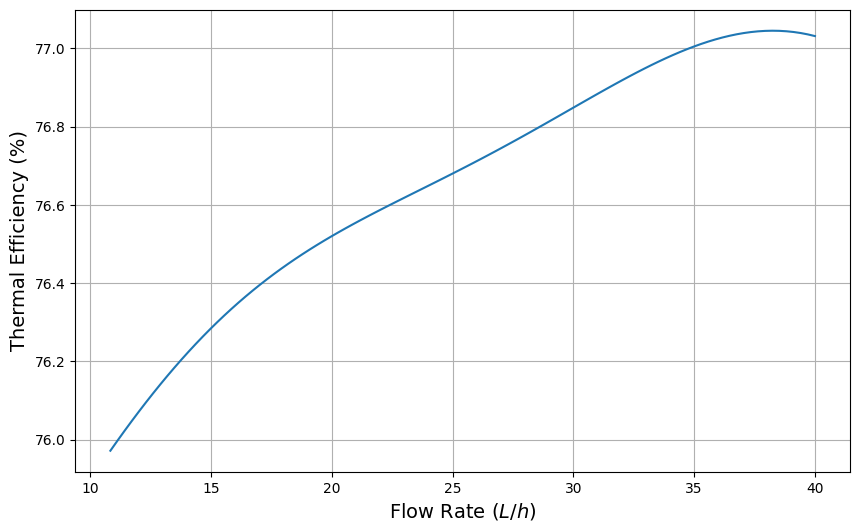

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x0_unscaled, z0_2D)
ax.set_xlabel('Flow Rate ($L/h$)', fontsize=14)
ax.set_ylabel('Thermal Efficiency (%)', fontsize=14)
ax.grid(True)
plt.savefig('Thermal_Flow.png')

plt.show()

In [26]:
from google.colab import files
files.download('Thermal_Flow.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

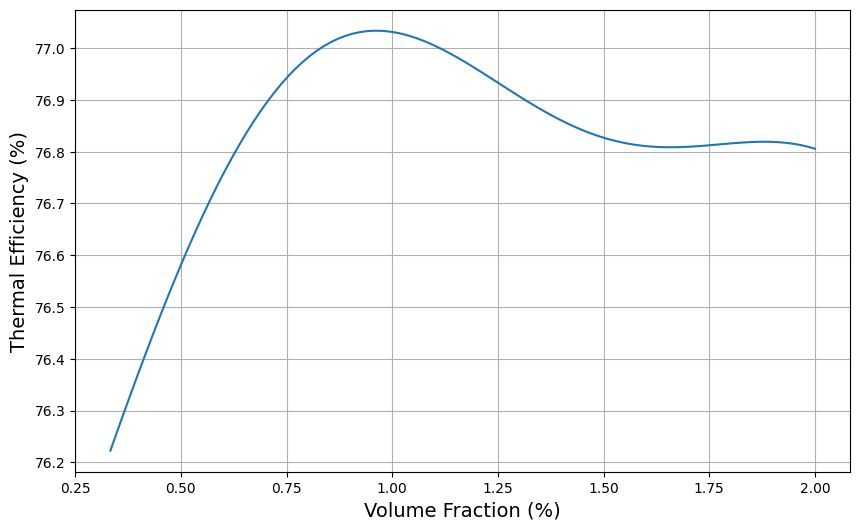

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x1_unscaled, z1_2D)

ax.set_xlabel('Volume Fraction (%)', fontsize=14)
ax.set_ylabel('Thermal Efficiency (%)', fontsize=14)
ax.grid(True)
plt.savefig('Thermal_Volume.png')
plt.show()

In [28]:
from google.colab import files
files.download('Thermal_Volume.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-29-9fa4adace402>:21: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



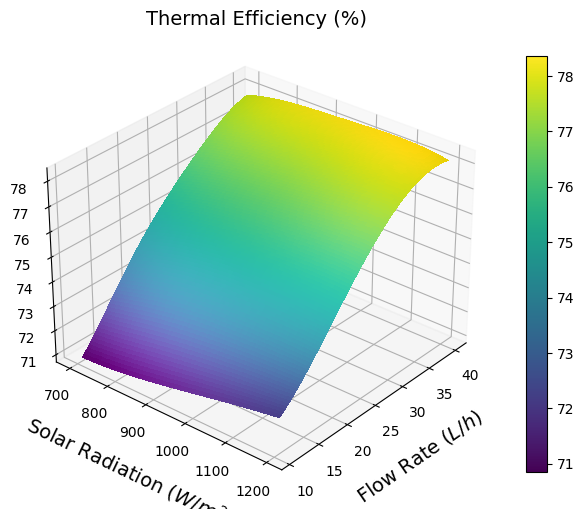

In [29]:

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)

rgb = ls.shade(z1, cmap=cm.viridis, vert_exag=0.1, blend_mode='soft')

surf = ax.plot_surface(x0_unscaled_m1, x2_unscaled_m1, z1, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)


ax.set_xlabel('Flow Rate ($L/h$)', fontsize=14, labelpad=10)
ax.set_ylabel('Solar Radiation ($W/m^2$)', fontsize=14, labelpad=10)

ax.view_init(elev=30, azim=40)

ax.set_title('Thermal Efficiency (%)',  fontsize=14)

m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(z1)
plt.colorbar(m, orientation='vertical', shrink=0.9)
ax.invert_xaxis()
plt.savefig('Thermal_Solar_Flow.png')
plt.show()

In [30]:
from google.colab import files
files.download('Thermal_Solar_Flow.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z1, x=x0_unscaled_m1, y=x2_unscaled_m1)])
fig.update_layout(title='Thermal Efficiency (%)', autosize=False,
                  width=500, height=500,
margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis=dict(autorange='reversed')
    )
)
fig.show()

<ipython-input-32-ca9cdc841d1c>:20: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



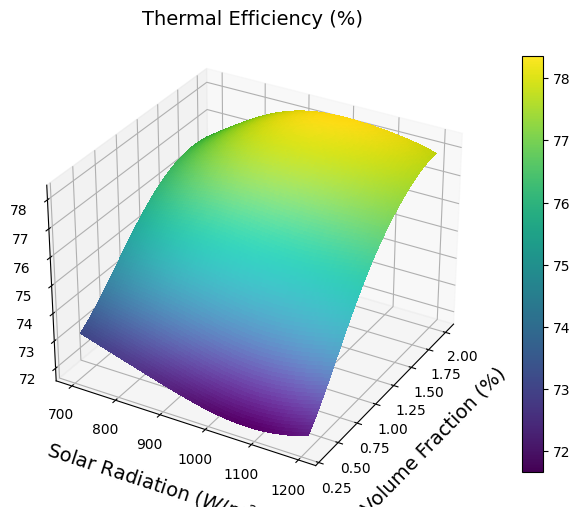

In [32]:

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)

rgb = ls.shade(z2, cmap=cm.viridis, vert_exag=0.1, blend_mode='soft')

surf = ax.plot_surface(x1_unscaled_m2, x2_unscaled_m2, z2, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)


ax.set_xlabel('Volume Fraction (%)', fontsize=14, labelpad=10)
ax.set_ylabel('Solar Radiation ($W/m^2$)', fontsize=14, labelpad=10)

ax.view_init(elev=30, azim=30)

ax.set_title('Thermal Efficiency (%)',  fontsize=14)
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(z2)
plt.colorbar(m, orientation='vertical', shrink=0.9)
ax.invert_xaxis()
plt.savefig('Thermal_Solar_Volume.png')
plt.show()


In [33]:
from google.colab import files
files.download('Thermal_Solar_Volume.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z2, x=x1_unscaled_m2, y=x2_unscaled_m2)])
fig.update_layout(title='Thermal Efficiency (%)', autosize=False,
                  width=500, height=500,
margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis=dict(autorange='reversed')
    )
)
fig.show()